In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import randint
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Select an Image Classification model

model_name = "mobilenetv2-035-128"

model_handle_map = {
   "mobilenetv2-035-128": "https://tfhub.dev/google/imagenet/mobilenet_v2_035_128/classification/2",
}

model_image_size_map = {
  "mobilenetv2-035-128": 128,
}

model_handle = model_handle_map[model_name]

In [3]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
images_path='/content/drive/MyDrive/archive (2)/Images/Images'
label_path='/content/drive/MyDrive/archive (2)/metadata.csv'
labels_df = pd.read_csv(label_path)
class_names = ('clean', 'dirty')
img_size = (128, 128, 3)
labels = []
images = []
#    csv.IMREAD_COLOR-> read image in colour
# resized to  img_size[0:2]
# convert to numpy array
for image in labels_df.iloc:
# Read the image
    img = cv2.imread(images_path +'/'+ image[0], cv2.IMREAD_COLOR)

    # Resize the image
    resized_img = cv2.resize(img, img_size[0:2])

    # Reverse color channels
    reversed_img = resized_img[:, :, ::-1]

    # Convert to numpy array
    np_img = np.asarray(reversed_img)

    # Append to images list
    images.append(np_img)
    label = np.zeros(2)
    label[image[1]] = 1
    labels.append(label)

->adding numpy of images to images          
->with resizing


In [5]:
labels=np.asarray(labels)
images=np.asarray(images)

In [6]:
images.shape

(237, 128, 128, 3)

In [7]:
labels.shape

(237, 2)

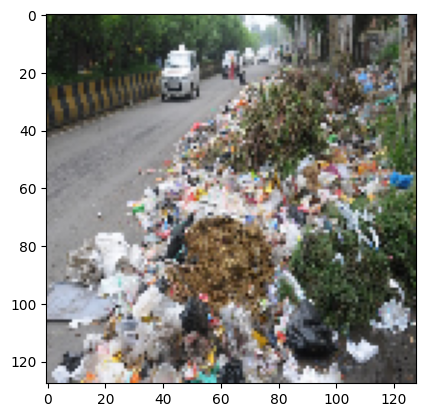

In [8]:
plt.imshow(images[22])

In [9]:
images[0].shape

(128, 128, 3)

In [10]:
def prepros_image(image):
  image=np.array(image)
  img_rsh=tf.reshape(image,[1,image.shape[0],image.shape[1],image.shape[2]])
  image=tf.image.convert_image_dtype(img_rsh,tf.float32)
  return image


->after shape would be (1,128,128,3)                           
->3 for 3 colour channels

In [11]:
classifier = hub.load("https://tfhub.dev/google/imagenet/mobilenet_v2_035_128/classification/1",
)

loading particular model

In [114]:
imagesdem=prepros_image(images[0])
imagesdem.shape


TensorShape([1, 128, 128, 3])

In [112]:
imagesdem

<tf.Tensor: shape=(1, 128, 128, 3), dtype=float32, numpy=
array([[[[0.13725491, 0.13725491, 0.13725491],
         [0.09019608, 0.09019608, 0.09019608],
         [0.10196079, 0.10196079, 0.10196079],
         ...,
         [0.18039216, 0.19215688, 0.14117648],
         [0.16078432, 0.1764706 , 0.10980393],
         [0.2784314 , 0.29803923, 0.21960786]],

        [[0.15294118, 0.15294118, 0.15294118],
         [0.10588236, 0.10588236, 0.10588236],
         [0.1137255 , 0.1137255 , 0.1137255 ],
         ...,
         [0.14509805, 0.18823531, 0.13333334],
         [0.19607845, 0.2392157 , 0.1764706 ],
         [0.14901961, 0.19607845, 0.1137255 ]],

        [[0.14509805, 0.14509805, 0.14509805],
         [0.09803922, 0.09803922, 0.09803922],
         [0.1137255 , 0.1137255 , 0.1137255 ],
         ...,
         [0.1137255 , 0.18039216, 0.12941177],
         [0.18039216, 0.25490198, 0.18431373],
         [0.09803922, 0.16862746, 0.09019608]],

        ...,

        [[0.5019608 , 0.5058824 , 

In [15]:
if model_name in model_image_size_map:
  image_s=model_image_size_map[model_name]
  dynMic_size=False
else:
  dynMic_size=True

labels_file="https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
downloaded_file = tf.keras.utils.get_file("labels.txt", origin=labels_file)
classes=[]
with open(downloaded_file) as f:
  labels=f.readlines()
  print(labels)
  classes=[l.strip() for l in labels]

['background\n', 'tench\n', 'goldfish\n', 'great white shark\n', 'tiger shark\n', 'hammerhead\n', 'electric ray\n', 'stingray\n', 'cock\n', 'hen\n', 'ostrich\n', 'brambling\n', 'goldfinch\n', 'house finch\n', 'junco\n', 'indigo bunting\n', 'robin\n', 'bulbul\n', 'jay\n', 'magpie\n', 'chickadee\n', 'water ouzel\n', 'kite\n', 'bald eagle\n', 'vulture\n', 'great grey owl\n', 'European fire salamander\n', 'common newt\n', 'eft\n', 'spotted salamander\n', 'axolotl\n', 'bullfrog\n', 'tree frog\n', 'tailed frog\n', 'loggerhead\n', 'leatherback turtle\n', 'mud turtle\n', 'terrapin\n', 'box turtle\n', 'banded gecko\n', 'common iguana\n', 'American chameleon\n', 'whiptail\n', 'agama\n', 'frilled lizard\n', 'alligator lizard\n', 'Gila monster\n', 'green lizard\n', 'African chameleon\n', 'Komodo dragon\n', 'African crocodile\n', 'American alligator\n', 'triceratops\n', 'thunder snake\n', 'ringneck snake\n', 'hognose snake\n', 'green snake\n', 'king snake\n', 'garter snake\n', 'water snake\n', 'vin

In [116]:
probab=tf.nn.softmax(classifier.signatures['default'](imagesdem)['default'])
top_5=tf.argsort(probab,direction='DESCENDING')[0][:5].numpy()
classes=np.array(classes)


In [17]:
classes

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

In [117]:

probab.shape
# to check existence of background class 1000+1

TensorShape([1, 1001])

In [118]:
top_5

array([724, 671, 583, 792, 982], dtype=int32)

In [119]:

for i, item in enumerate(top_5):
  class_index = item
  print(classes[class_index])



pinwheel
motor scooter
grocery store
shopping cart
ballplayer


In [120]:
labels_df

,filename,label
0,dirty_2.jpg,1
1,clean_36.jpg,0
2,clean_31.jpg,0
3,dirty_69.jpg,1
4,clean_113.jpg,0
...,...,...
232,clean_83.jpg,0
233,dirty_123.jpg,1
234,dirty_76.jpg,1
235,clean_88.jpg,0


In [22]:

for image in labels_df.iloc:
  print(image[0])
  print(image[1])

dirty_2.jpg
1
clean_36.jpg
0
clean_31.jpg
0
dirty_69.jpg
1
clean_113.jpg
0
clean_102.jpg
0
clean_43.jpg
0
dirty_27.jpg
1
dirty_53.jpg
1
clean_55.jpg
0
clean_28.jpg
0
dirty_55.jpg
1
clean_103.jpg
0
dirty_31.jpg
1
dirty_22.jpg
1
dirty_118.jpg
1
clean_62.jpg
0
clean_51.jpg
0
dirty_66.jpg
1
clean_61.jpg
0
clean_99.jpg
0
dirty_92.jpg
1
dirty_4.jpg
1
clean_70.jpg
0
dirty_17.jpg
1
clean_54.jpg
0
dirty_52.jpg
1
dirty_11.jpg
1
clean_81.jpg
0
dirty_34.jpg
1
dirty_107.jpg
1
dirty_15.jpg
1
clean_94.jpg
0
dirty_90.jpg
1
dirty_18.jpg
1
dirty_60.jpg
1
dirty_74.jpg
1
clean_71.jpg
0
dirty_121.jpg
1
dirty_35.jpg
1
dirty_91.jpg
1
dirty_49.jpg
1
clean_8.jpg
0
dirty_124.jpg
1
dirty_37.jpg
1
dirty_64.jpg
1
dirty_33.jpg
1
clean_52.jpg
0
clean_107.jpg
0
clean_110.jpg
0
clean_24.jpg
0
clean_38.jpg
0
dirty_1.jpg
1
clean_7.jpg
0
dirty_99.jpg
1
dirty_86.jpg
1
dirty_12.jpg
1
dirty_67.jpg
1
dirty_36.jpg
1
dirty_8.jpg
1
clean_96.jpg
0
dirty_80.jpg
1
dirty_119.jpg
1
dirty_46.jpg
1
clean_92.jpg
0
clean_25.jpg
0
clean_

In [30]:
class_name=['clean','dirty']
images=[]
labels=[]
for image in labels_df.iloc:
    images.append(np.asarray(cv2.resize(cv2.imread(images_path +'/'+ image[0], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))

    # labels will be in the form of a vector: [0, 1] or [1, 0]
    label = np.zeros(2)
    label[image[1]] =
    # oen hot encoded
    labels.append(label)

labels = np.asarray(labels)
images = np.asarray(images)
print(len(labels))
labels.shape,labels

237


((237, 2),
 array([[0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],

->naming classes                   
->appending images                      
one-hot encoding and converting to numpy array

In [85]:
X_train,X_val,y_train,y_val=train_test_split(images,labels,test_size=0.1,random_state=42)


splitting into train and val

In [46]:
X_train.shape

(213, 128, 128, 3)

(213, 128, 128, 3)

In [45]:
y_train.shape

(213, 2)

In [32]:
images.shape

(237, 128, 128, 3)

In [34]:
train_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.3,
                                                                         rotation_range=15,
                                                                         zoom_range=0.3,
                                                                         vertical_flip=True,
                                                                         horizontal_flip=True)
train_images_generator=train_images_generator.flow(X_train,y_train)

# for validation images


Validation_images_generator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.3,
                                                                         rotation_range=15,
                                                                         zoom_range=0.3,
                                                                         vertical_flip=True,
                                                                         horizontal_flip=True)
Validation_images_generator=Validation_images_generator.flow(X_train,y_train)


data augmenting train and validation images  for psuedo increasing database

In [42]:
model=tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(128,128,3)),
        hub.KerasLayer(model_handle, trainable=False),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(2,kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])


input layer ->(128,128,3)

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              1692489   
                                                                 
 dropout_1 (Dropout)         (None, 1001)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2004      
                                                                 
Total params: 1694493 (6.46 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


In [80]:
model.compile(
    optimizer='adam',  # Note the corrected parameter name
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
    metrics=['accuracy']
)


In [121]:
model.fit(train_images_generator, epochs=40,
    verbose=1,validation_data=Validation_images_generator)

Epoch 1/40
7/7 [==============================] - 3s 469ms/step - loss: 0.5168 - accuracy: 0.8263 - val_loss: 0.4672 - val_accuracy: 0.8310
Epoch 2/40
7/7 [==============================] - 2s 230ms/step - loss: 0.5281 - accuracy: 0.7934 - val_loss: 0.4639 - val_accuracy: 0.8263
Epoch 3/40
7/7 [==============================] - 2s 229ms/step - loss: 0.5180 - accuracy: 0.8216 - val_loss: 0.4600 - val_accuracy: 0.8122
Epoch 4/40
7/7 [==============================] - 2s 230ms/step - loss: 0.4816 - accuracy: 0.8075 - val_loss: 0.4514 - val_accuracy: 0.8404
Epoch 5/40
7/7 [==============================] - 2s 233ms/step - loss: 0.4861 - accuracy: 0.8592 - val_loss: 0.4439 - val_accuracy: 0.8498
Epoch 6/40
7/7 [==============================] - 2s 231ms/step - loss: 0.5062 - accuracy: 0.8028 - val_loss: 0.4314 - val_accuracy: 0.8545
Epoch 7/40
7/7 [==============================] - 2s 320ms/step - loss: 0.5414 - accuracy: 0.7606 - val_loss: 0.4819 - val_accuracy: 0.7840
Epoch 8/40
7/7 [====

In [58]:
X_train[22].shape

(128, 128, 3)

In [122]:
l=[1,12,22,11,10,23,7,14]

1/1 [==============================] - 0s 21ms/step
dirty


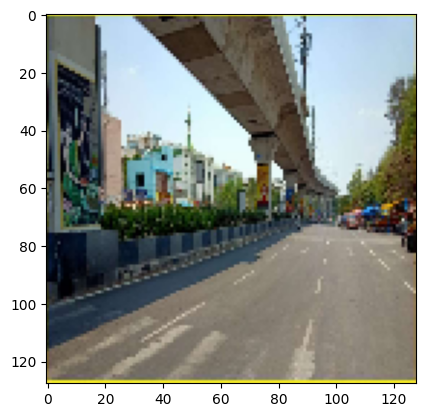

name:dirty

dirty


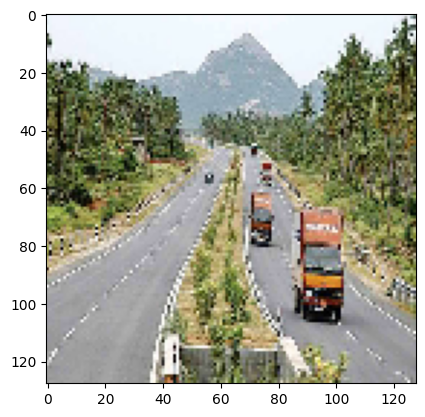

name:dirty

dirty


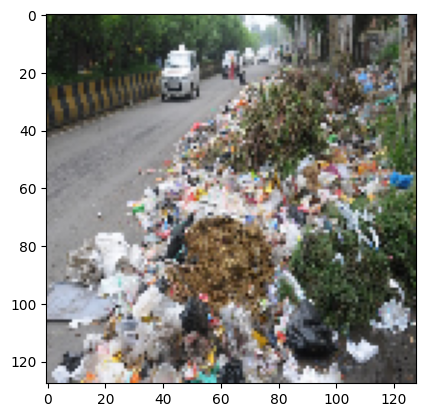

name:dirty

dirty


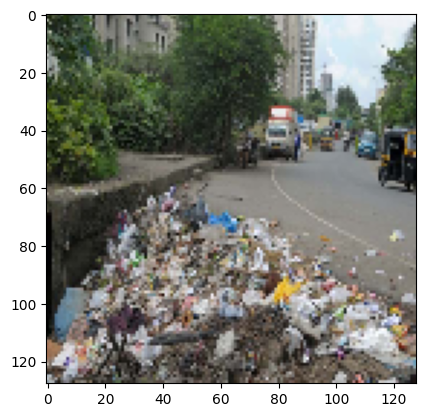

name:clean

dirty


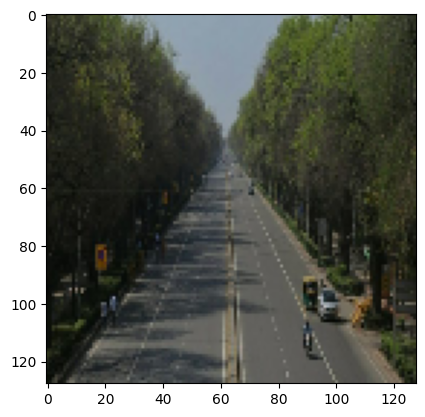

name:dirty

dirty


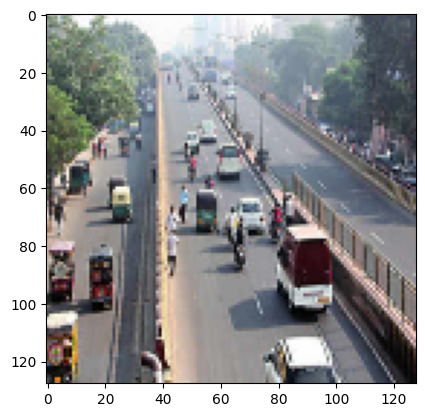

name:dirty

dirty


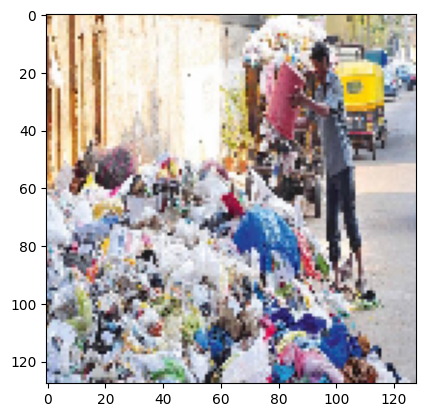

name:dirty

dirty


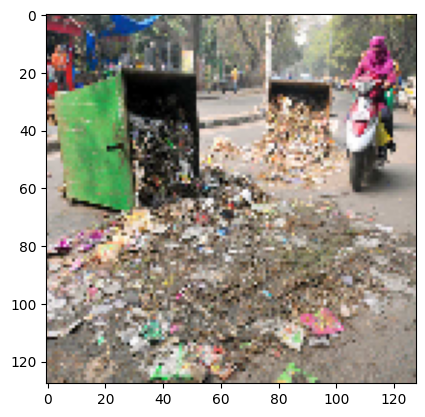

name:clean



In [123]:

single_image = X_train[22]  # Replace 0 with the index of the sample you want to predict
single_image = np.expand_dims(single_image, axis=0)
single_prediction = model.predict(single_image)

for i in l:
  plt.imshow(images[i])
  result(i)
  print('')

In [108]:
def result(x):
  if np.argmax(single_prediction)==1:
    print("dirty")
  else:
    print("clean")
  plt.show()
  print(f"name:{class_names[np.argmax(y_val[i])]}")

it got majority right except few images.Could be due to few faulty data in dataset itself.
